In [1]:
import os
import json

from matplotlib import pyplot as plt

from pymatgen.core.periodic_table import DummySpecies
from pymatgen.core import Structure
from pymatgen.io.ase import AseAtomsAdaptor
from ase.visualize.plot import plot_atoms

In [2]:
with open('fig1defects.json') as file:
    defects = json.load(file)

In [3]:
for defect_type in defects:
    defects[defect_type] = Structure.from_dict(defects[defect_type])

/miniconda/envs/screening/lib/python3.8/site-packages/pymatgen/core/structure.py:742: UserWarning: Not all sites have property was. Missing values are set to None.
  warnings.warn("Not all sites have property %s. Missing values " "are set to None." % k)


In [4]:
def plot_defect_from_defect_type(defect_type: str, ax):
    defect = defects[defect_type]
    for i, point_defect in enumerate(defect):
        if point_defect.specie == DummySpecies():
            defect[i].species = 'O'  # to mark defect as a red circle
    ase_atoms = AseAtomsAdaptor.get_atoms(defect)
    
    ax.axis('off')
    plot_atoms(ase_atoms, ax, radii=0.7, rotation=('12x, 0y, 0z'), show_unit_cell=False)

In [5]:
defect_types = [f'X{i}' for i in range(1, 6)] +\
    [f'V{i}' for i in range(1, 7)] +\
    [f'S{i}' for i in range(1, 7)]

In [6]:
os.makedirs("defects4x4", exist_ok=True)

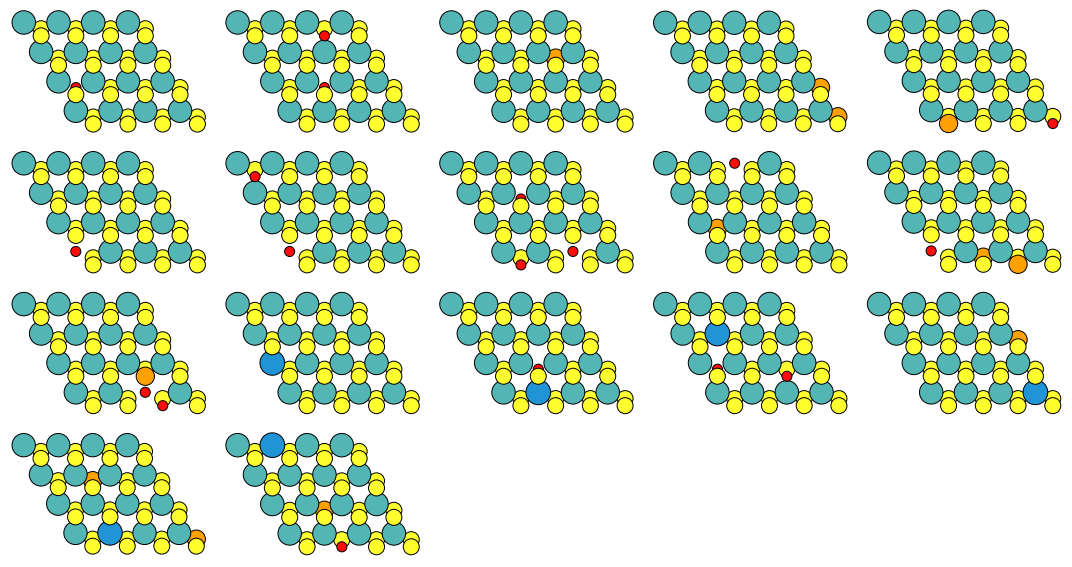

In [7]:
fig, axes = plt.subplots(4, 5, figsize=(15, 8))
plt.rc('axes', titlesize=18)
# ax.axis('off')
for i in range(len(defect_types)):
    ax = axes[i//5][i%5]
    name = defect_types[i]
    plot_defect_from_defect_type(name, ax)
axes[3][2].axis('off')
axes[3][3].axis('off')
axes[3][4].axis('off')


plt.tight_layout()
fig.savefig(f"defects4x4/all_defects.png", dpi=500)

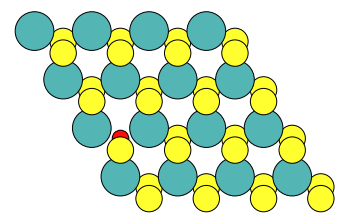

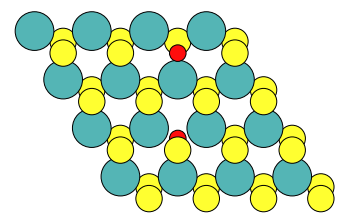

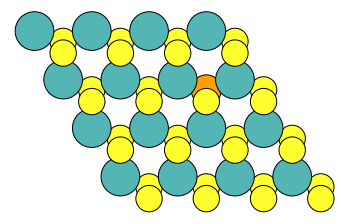

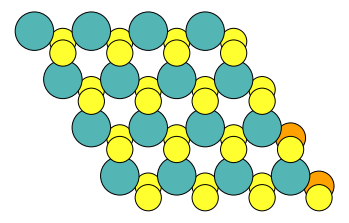

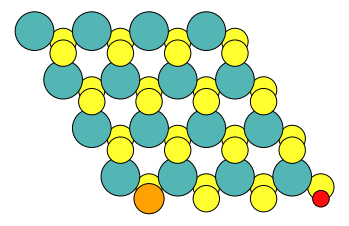

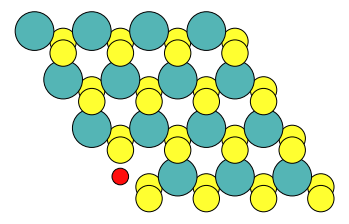

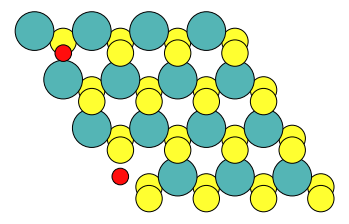

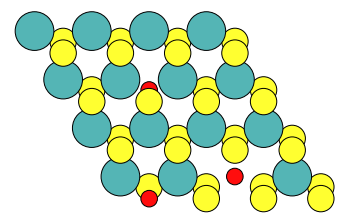

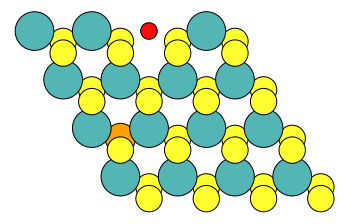

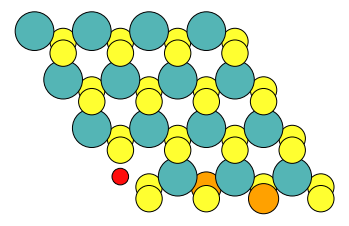

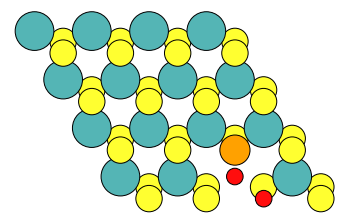

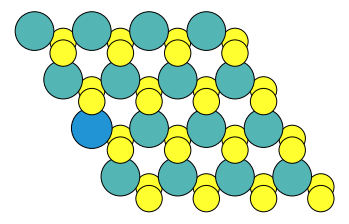

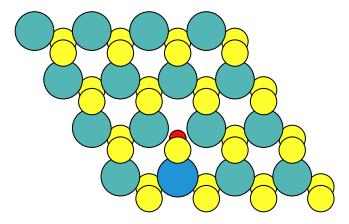

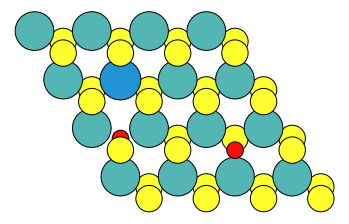

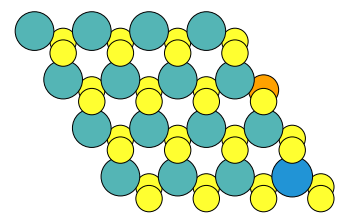

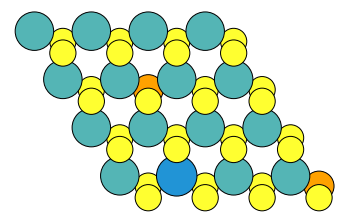

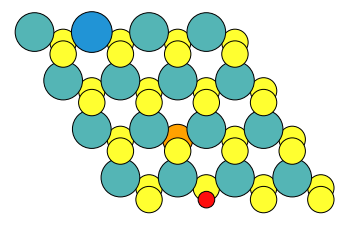

In [8]:
for i in range(len(defect_types)):
    fig, ax = plt.subplots()
    name = defect_types[i]
    plot_defect_from_defect_type(name, ax)
    fig.savefig(f"defects4x4/{defect_types[i]}_4x4.png", dpi=300)